In [2]:
import PID
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
%matplotlib inline

## define PID weights

PID controller minimizes error by adjusting a control variable (eg power supplied) to a new value determined by a weighted sum of present (P), past (I), and future (D) error values.

In [51]:
P = 1. # weight current errors more
I = 5
D = 0.0 # ignore future potential errors 

In [52]:
L = 50 # number of iterations

In [53]:
pid = PID.PID(P, I, D)

pid.SetPoint=0.0
pid.setSampleTime(0.01)

END = L
feedback = 0

feedback_list = []
time_list = []
setpoint_list = []

p_term_list = []
i_term_list = []
d_term_list = []

for i in range(1, END):
    pid.update(feedback)
    
    p_term_list.append(pid.PTerm)
    i_term_list.append(pid.ITerm)
    d_term_list.append(pid.DTerm)
    
    output = pid.output
    if pid.SetPoint > 0:
        feedback += (output - (1/i))
    if i>9:
        pid.SetPoint = 1
    time.sleep(0.02)

    feedback_list.append(feedback)
    setpoint_list.append(pid.SetPoint)
    time_list.append(i)

time_sm = np.array(time_list)
time_smooth = np.linspace(time_sm.min(), time_sm.max(), 300) 
feedback_smooth = make_interp_spline(time_list, feedback_list)(time_smooth)



## how quickly does it converge?

green is desired value; blue is actual

In [54]:
print(setpoint_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [55]:
print(feedback_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0095461932095615, 1.0161634745720125, 1.0209495043059862, 1.0243374485716035, 1.0266442866101881, 1.0281276602527574, 1.0289737638366034, 1.0293196683884174, 1.0292951837192268, 1.0289796111853848, 1.028443535604998, 1.0277464619945345, 1.02692693415563, 1.0260287606264447, 1.0250716713972445, 1.024082495070477, 1.0230871797303907, 1.022090784420016, 1.0211025698001508, 1.0201274010725745, 1.0191775989238625, 1.0182552858398783, 1.0173655647895872, 1.0165080824590689, 1.0156852730837274, 1.0148983750562932, 1.0141503207974696, 1.0134371656047703, 1.01275942008446, 1.0121161392061544, 1.011505313085671, 1.0109250655463369, 1.010379940374826, 1.0098652791612799, 1.0093785458238762, 1.0089195913866436, 1.008484564207457, 1.0080738080934175, 1.0076862563973377]


(0.5, 1.5)

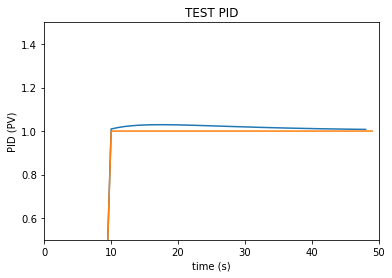

In [57]:
# plt.plot(time_smooth, feedback_smooth)
plt.plot(time_list[:-1]                                                                                                                                                                                                                         , feedback_list[1:])
plt.plot(time_list, setpoint_list)
plt.xlim((0, L))
plt.ylim((min(feedback_list)-0.5, max(feedback_list)+0.5))
plt.xlabel('time (s)')
plt.ylabel('PID (PV)')
plt.title('TEST PID')

plt.ylim((1-0.5, 1+0.5))